# Fetching and Observing the Data

In [128]:
# Let's import necessary libraries.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import choice
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [129]:
# Fetching the dataset and observing the data.
data = pd.read_csv('titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [130]:
# Getting statistical information about the dataset.
data.describe()

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


In [131]:
# Getting information about the columms.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


# Data Cleaning and Feature Selection

In [133]:
data.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"


In [134]:
# Observing the null values.
data.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

We do not have null values.

In [136]:
# Removing duplicates.
data = data.drop_duplicates()

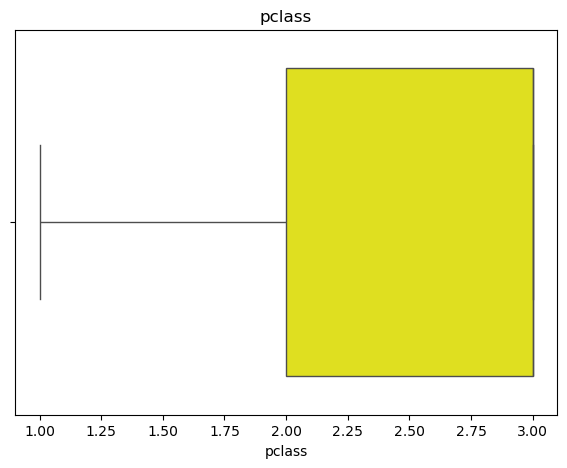

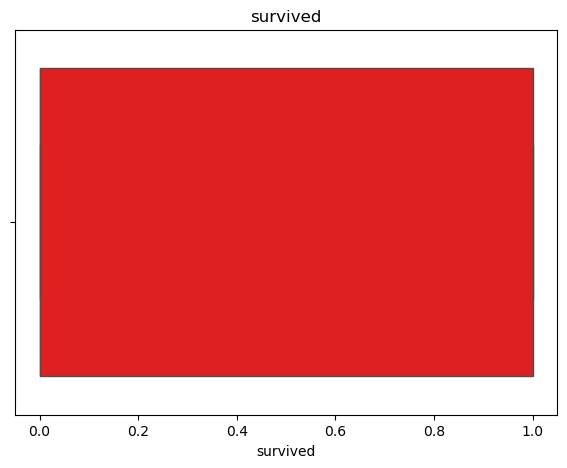

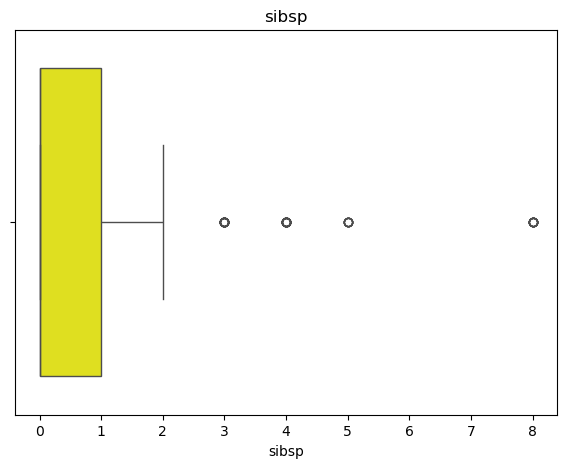

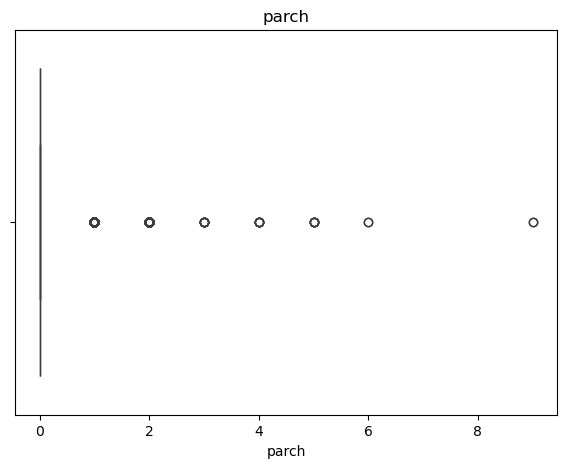

In [137]:
# Visualizing outliers in numerical columns.
num_cols = data.select_dtypes(include = 'number').columns
colors = ['blue', 'red', 'green', 'yellow', 'brown', 'cyan']
for col in num_cols:
    plt.figure(figsize = (7, 5))
    sns.boxplot(data, x = col, color = choice(colors))
    plt.title(col)
    plt.xlabel(col)

In [138]:
# Observing the 'pclass' column.
data['pclass'].unique()

array([1, 2, 3], dtype=int64)

The 'pclass' column indicates the class of the passenger and it has order logic.

'survived' column is our target column and is numeric.

We do not need 'name' column since it has unique values that we do need in our model. So I will remove it.

In [142]:
# Dropping the 'name' column.
data = data.drop(columns = 'name')

'sex' column has only 2 values and it is categorical so I will encode it by creating dummy variable.

In [144]:
# Creating dummy variable for 'sex' column.
data = pd.get_dummies(data, columns=['sex'], dtype='int', drop_first=True)

Age column indicates the age of the passenger and it will be scaled since it is continous.

In [146]:
# Checking the data type of this column.
data['age'].dtype

dtype('O')

Since it is not in the correct data type I will convert it to numeric.

In [148]:
# Observing the unique values inside the 'age' column.
data['age'].unique()

array(['29', '0.9167', '2', '30', '25', '48', '63', '39', '53', '71',
       '47', '18', '24', '26', '80', '?', '50', '32', '36', '37', '42',
       '19', '35', '28', '45', '40', '58', '22', '41', '44', '59', '60',
       '33', '17', '11', '14', '49', '76', '46', '27', '64', '55', '70',
       '38', '51', '31', '4', '54', '23', '43', '52', '16', '32.5', '21',
       '15', '65', '28.5', '45.5', '56', '13', '61', '34', '6', '57',
       '62', '67', '1', '12', '20', '0.8333', '8', '0.6667', '7', '3',
       '36.5', '18.5', '5', '66', '9', '0.75', '70.5', '22.5', '0.3333',
       '0.1667', '40.5', '10', '23.5', '34.5', '20.5', '30.5', '55.5',
       '38.5', '14.5', '24.5', '60.5', '74', '0.4167', '11.5', '26.5'],
      dtype=object)

In [149]:
# Converting the 'age' column to numeric by coercing the non-numeric values into NA.
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [150]:
# Filling the NA values with the mean in 'age' column.
data['age'] = data['age'].fillna(value=data['age'].mean(skipna=True))

In [151]:
# Scaling the 'age' column with StandardScaler().
scaler = StandardScaler()
data['age'] = scaler.fit_transform(data[['age']])

In [152]:
# Observing the 'sibsp' column which means the number of siblings or spouses aboard the Titanic.
data['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

This column is also numeric and continous and I will scale this column.

In [154]:
# Scaling the 'sibsp' column.
data['sibsp'] = scaler.fit_transform(data[['sibsp']])

Observing the 'parch' column which indicates the number of parents or children aboard the Titanic.

In [156]:
data['parch'].unique()

array([0, 2, 1, 4, 3, 5, 6, 9], dtype=int64)

'Parch' column is also numeric and continous and I will scale it with StandardScaler()

In [158]:
# Scaling the 'parch' column.
data['parch'] = scaler.fit_transform(data[['parch']])

'ticket' indicates the ticket number and only has unique values which we do not need in our model so I will remove it.

In [160]:
# Removing the 'ticket' column.
data = data.drop(columns = 'ticket')

'fare' column indicates the price of the ticket the passenger has bought.

In [162]:
# Let's observe the data tyoe of the 'fare' column.
data['fare'].dtype

dtype('O')

Since it is not in the right data type I will convert it into numeric.

In [164]:
data['fare'] = pd.to_numeric(data['fare'], errors='coerce')

In [165]:
data['fare'].isnull().sum()

1

In [166]:
# Replacing the null values.
data['fare'] = data['fare'].fillna(value = data['fare'].mean(skipna=True))

In [167]:
# Scaling the 'fare' column.
data['fare'] = scaler.fit_transform(data[['fare']])

Cabin indicates the cabin code the passenger was in.

In [169]:
# Observing this column.
data['cabin'].nunique()

187

This column is crucial for us so I will encode it instead of removing it.

In [171]:
# Encoding 'cabin' column.
data = pd.get_dummies(data, columns = ['cabin'], drop_first=True, dtype = 'int')

'embarked' column indicates the port where each passenger boarded the Titanic.

In [173]:
# Let;s oberve our 'embarked' column.
data['embarked'].unique()

array(['S', 'C', '?', 'Q'], dtype=object)

In [174]:
data['embarked'].value_counts()

embarked
S    914
C    270
Q    123
?      2
Name: count, dtype: int64

In [175]:
# Replacing '?' with the most common embarked value.
data['embarked'] = data['embarked'].replace(to_replace='?', value=data['embarked'].mode()[0])

In [176]:
# Encoding 'embarked' column.
data = pd.get_dummies(data, columns = ['embarked'], drop_first=True, dtype = 'int')

'boat' column indicates the lifeboat number that the passenger was assigned to or actually boarded.

In [178]:
# Observing this column's values.
data['boat'].nunique()

28

In [179]:
# Encoding the 'boat' column.
data = pd.get_dummies(data, columns = ['boat'], drop_first = True, dtype = 'int')

'body' column is just the identification number assigned to a recovered body so it has unique values and is not good for a model.

In [181]:
# Removing the 'body' column.
data = data.drop(columns = 'body')

'home.dest' column indicates the destination address of the passenger so it has high cardinality so I will remove it.

In [183]:
data = data.drop(columns = 'home.dest')

In [184]:
data.head(1)

,pclass,survived,age,sibsp,parch,fare,sex_male,cabin_A10,cabin_A11,cabin_A14,...,boat_7,boat_8,boat_8 10,boat_9,boat_?,boat_A,boat_B,boat_C,boat_C D,boat_D
0,1,1,-0.06842,-0.479087,-0.445,3.44248,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling

In [186]:
# Specifying our target and feature columns.
x = data.drop(columns = 'survived')
y = data['survived']

In [187]:
# Let's split our dataset to train and test parts.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [188]:
# Let's define our model.
model = RandomForestClassifier(random_state=42)

In [189]:
# Let's define our parameter grid.
params = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [190]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [191]:
# Let's define our grid_search.
grid_search = GridSearchCV(
    estimator = model,
    param_grid = params,
    cv = cv,
    scoring = 'accuracy',
    n_jobs = -1,
    return_train_score = True
)

In [192]:
# Let's fit our model.
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250]},
             return_train_score=True, scoring='accuracy')

In [193]:
print('The best estimator was ', grid_search.best_estimator_)
print('The best parameters were ', grid_search.best_params_)
print('The best accuracy was ', grid_search.best_score_)

The best estimator was  RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=150,
                       random_state=42)
The best parameters were  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
The best accuracy was  0.9770608339029392


In [194]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.196607,0.008684,0.019380,0.008506,5,1,2,50,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.923810,...,0.952253,0.020671,103,0.940263,0.956989,0.971360,0.940334,0.976134,0.957016,0.015035
1,0.403753,0.017642,0.025513,0.019816,5,1,2,100,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.914286,...,0.951310,0.020264,107,0.937873,0.968937,0.971360,0.951074,0.978520,0.961553,0.014894
2,0.751877,0.067106,0.046742,0.017199,5,1,2,150,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.938095,...,0.957977,0.014268,99,0.959379,0.973716,0.971360,0.957041,0.977327,0.967764,0.008064
3,0.969889,0.028659,0.036835,0.006060,5,1,2,200,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.952381,...,0.963705,0.008848,94,0.965352,0.968937,0.971360,0.952267,0.977327,0.967049,0.008357
4,1.231162,0.064804,0.050892,0.021215,5,1,2,250,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.947619,...,0.962752,0.010172,95,0.965352,0.967742,0.970167,0.958234,0.978520,0.968003,0.006600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.185981,0.004971,0.014929,0.002276,20,4,10,50,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.885714,...,0.924539,0.029300,149,0.909200,0.956989,0.928401,0.920048,0.939141,0.930756,0.016391
176,0.379883,0.016091,0.023411,0.010408,20,4,10,100,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.871429,...,0.923604,0.029788,151,0.908005,0.955795,0.928401,0.902148,0.958234,0.930516,0.023338
177,0.545157,0.044417,0.022958,0.002456,20,4,10,150,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.914286,...,0.932171,0.021251,128,0.934289,0.961768,0.929594,0.904535,0.958234,0.937684,0.020872
178,0.725466,0.024740,0.029101,0.006271,20,4,10,200,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.890476,...,0.927409,0.029312,138,0.913978,0.948626,0.946301,0.902148,0.943914,0.930993,0.019151


In [195]:
results.to_csv('titanic_tuning_results.csv')

In [196]:
# Now let's test our model with unkown data to the model.
best_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=1)

In [197]:
best_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=5)

In [198]:
y_pred = best_model.predict(x_test)

In [199]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy:  0.9732824427480916
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       144
           1       1.00      0.94      0.97       118

    accuracy                           0.97       262
   macro avg       0.98      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



# Evaluation

The model performed very well with high metrices.